# Obtaining and getting to know our data

In [1]:
#importing the libs that we'll be needing.
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime

#retail data set of a global superstore for 4 years, obtained in Kaggle (kaggle.com/jr2ngb/superstore-data)
df = pd.read_csv('superstore_dataset2011-2015.csv', encoding = 'unicode_escape')

#checking the first 3 rows of our data
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High


In [2]:
#letting pandas know we want to see all the columns of our df (at least for the first time, since they're not that many)
pd.options.display.max_columns = None

df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,NaN,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,NaN,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High


In [3]:
#quick question we need answered to move forward: do orders have more than 1 item?
#that would mean that the order_id column appears can appear more than once

df['Order ID'].value_counts()

CA-2014-100111    14
IN-2012-41261     13
MX-2014-166541    13
IN-2013-42311     13
NI-2014-8880      13
                  ..
CA-2014-105193     1
EG-2014-5280       1
CA-2013-110044     1
IN-2013-71753      1
MX-2014-133746     1
Name: Order ID, Length: 25035, dtype: int64

Ok, question answered!

### Assumptions: 
1.'Sales' is the revenue from that/those product(s) in each row;

2.'Profit' is the result of sales - (total costs + shipping costs);

3.A 'Sales by Unit' column could divide sales by quantity, and that would allow us to obtain an "avarage ticket" info;

4.A 'Total Cost' column would come from: sales - (profit + shipping cost) of each row.

In [4]:
#.info() allows us to check quickly for any null values in our df, as well as for the types of our values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

Looks like postal code is the only column with null values, and maybe it's not a column that's gonna be that useful for us.

In [5]:
#before we do anything else, let's apply the 2 decimals float format for better reading of our data
pd.options.display.float_format = "{:,.2f}".format

# Data cleaning and transformation

In [6]:
#changing to all lower case names for our column headers
df.columns = map(str.lower, df.columns)
df.columns

Index(['row id', 'order id', 'order date', 'ship date', 'ship mode',
       'customer id', 'customer name', 'segment', 'city', 'state', 'country',
       'postal code', 'market', 'region', 'product id', 'category',
       'sub-category', 'product name', 'sales', 'quantity', 'discount',
       'profit', 'shipping cost', 'order priority'],
      dtype='object')

In [7]:
#transforming our order and ship dates to a date format
df['order date'] = pd.to_datetime(df['order date'])
df['ship date'] = pd.to_datetime(df['ship date'])

In [8]:
#date of first order
df['order date'].min()

Timestamp('2011-01-01 00:00:00')

In [9]:
#date of last order
df['order date'].max()

Timestamp('2014-12-31 00:00:00')

Looks like we have a complete df in terms of time (data logs from 2011-01-01 to 2014-12-31)

In [10]:
#deleting the postal code column
del df['postal code']

In [11]:
df.columns

Index(['row id', 'order id', 'order date', 'ship date', 'ship mode',
       'customer id', 'customer name', 'segment', 'city', 'state', 'country',
       'market', 'region', 'product id', 'category', 'sub-category',
       'product name', 'sales', 'quantity', 'discount', 'profit',
       'shipping cost', 'order priority'],
      dtype='object')

In [12]:
#changing the name of our columns
df.columns = ['row_id','order_id','order_date','ship_date','ship_mode','cust_id','cust_name','segment','city','state',
             'country', 'market', 'region', 'product_id', 'category',
       'sub_category', 'product_name', 'sales', 'quantity', 'discount',
       'profit', 'shipping_cost', 'order_priority']

In [13]:
#adding a year, a month, a day of week and year_month column

df['year'] = pd.DatetimeIndex(df['order_date']).year
df['month'] = pd.DatetimeIndex(df['order_date']).month
df['year_month'] = pd.to_datetime(df['order_date']).dt.to_period('M')
df['day_of_week'] = pd.DatetimeIndex(df['order_date']).dayofweek #monday is 0, tuesday is 1...

df.head()

,row_id,order_id,order_date,ship_date,ship_mode,cust_id,cust_name,segment,city,state,country,market,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,month,year_month,day_of_week
0,42433,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.30,2,0.00,106.14,35.46,Medium,2011,1,2011-01,5
1,22253,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.37,3,0.10,36.04,9.72,Medium,2011,1,2011-01,5
2,48883,HU-2011-1220,2011-01-01,2011-05-01,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.12,4,0.00,29.64,8.17,High,2011,1,2011-01,5
3,11731,IT-2011-3647632,2011-01-01,2011-05-01,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.87,3,0.50,-26.05,4.82,High,2011,1,2011-01,5
4,22255,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.67,5,0.10,37.77,4.70,Medium,2011,1,2011-01,5


In [14]:
#creating a column that tells the time spent between ordering and shipping a product, in days
df['order_to_ship_days'] = (df['ship_date'] - df['order_date']).dt.days

#creating a sales by unit column
df['sales_by_unit'] = df['sales']/df['quantity']

#creating a total cost column and a unit cost column
df['total_cost'] = df['sales'] - (df['profit'] + df['shipping_cost'])
df['unit_cost'] = df['total_cost']/df['quantity']

df.head(2)

,row_id,order_id,order_date,ship_date,ship_mode,cust_id,cust_name,segment,city,state,country,market,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,month,year_month,day_of_week,order_to_ship_days,sales_by_unit,total_cost,unit_cost
0,42433,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.30,2,0.00,106.14,35.46,Medium,2011,1,2011-01,5,151,204.15,266.70,133.35
1,22253,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.37,3,0.10,36.04,9.72,Medium,2011,1,2011-01,5,212,40.12,74.61,24.87


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
row_id,"51,290.00","25,645.50","14,806.29",1.00,"12,823.25","25,645.50","38,467.75","51,290.00"
sales,"51,290.00",246.49,487.57,0.44,30.76,85.05,251.05,"22,638.48"
quantity,"51,290.00",3.48,2.28,1.00,2.00,3.00,5.00,14.00
discount,"51,290.00",0.14,0.21,0.00,0.00,0.00,0.20,0.85
profit,"51,290.00",28.61,174.34,"-6,599.98",0.00,9.24,36.81,"8,399.98"
shipping_cost,"51,290.00",26.38,57.30,0.00,2.61,7.79,24.45,933.57
year,"51,290.00","2,012.78",1.10,"2,011.00","2,012.00","2,013.00","2,014.00","2,014.00"
month,"51,290.00",7.14,3.39,1.00,4.00,7.00,10.00,12.00
day_of_week,"51,290.00",2.60,1.83,0.00,1.00,3.00,4.00,6.00
order_to_ship_days,"51,290.00",5.08,97.77,-322.00,1.00,4.00,59.00,214.00


### Looks like we have sales that do not give profit
Could that be related to discounts?

### Looks like we have negative order_to_ship_days values
Maybe we should check that

In [16]:
#checking the negative order_to_ship rows
negative_days = df[df['order_to_ship_days'] < 0]

negative_days.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9687 entries, 1512 to 51092
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   row_id              9687 non-null   int64         
 1   order_id            9687 non-null   object        
 2   order_date          9687 non-null   datetime64[ns]
 3   ship_date           9687 non-null   datetime64[ns]
 4   ship_mode           9687 non-null   object        
 5   cust_id             9687 non-null   object        
 6   cust_name           9687 non-null   object        
 7   segment             9687 non-null   object        
 8   city                9687 non-null   object        
 9   state               9687 non-null   object        
 10  country             9687 non-null   object        
 11  market              9687 non-null   object        
 12  region              9687 non-null   object        
 13  product_id          9687 non-null   object  

In [17]:
negative_days.head()

,row_id,order_id,order_date,ship_date,ship_mode,cust_id,cust_name,segment,city,state,country,market,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,month,year_month,day_of_week,order_to_ship_days,sales_by_unit,total_cost,unit_cost
1512,25146,ID-2011-41632,2011-06-01,2011-01-13,Standard Class,RD-19660,Robert Dilbeck,Home Office,Ho Chi Minh City,Ho Chí Minh City,Vietnam,APAC,Southeast Asia,OFF-ST-10001631,Office Supplies,Storage,"Tenex Trays, Blue",89.99,2,0.17,29.27,3.62,Medium,2011,6,2011-06,2,-139,44.99,57.10,28.55
1514,25145,ID-2011-41632,2011-06-01,2011-01-13,Standard Class,RD-19660,Robert Dilbeck,Home Office,Ho Chi Minh City,Ho Chí Minh City,Vietnam,APAC,Southeast Asia,OFF-PA-10003407,Office Supplies,Paper,"Enermax Memo Slips, Recycled",38.77,3,0.17,11.59,2.45,Medium,2011,6,2011-06,2,-139,12.92,24.73,8.24
1517,33056,CA-2011-141817,2011-06-01,2011-01-13,Standard Class,MB-18085,Mick Brown,Consumer,Philadelphia,Pennsylvania,United States,US,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.54,3,0.20,4.88,1.85,Low,2011,6,2011-06,2,-139,6.51,12.80,4.27
1794,28200,IN-2011-33351,2011-07-02,2011-02-13,Standard Class,DB-13660,Duane Benoit,Consumer,Zhenjiang,Jiangsu,China,APAC,North Asia,OFF-AP-10003491,Office Supplies,Appliances,"Hoover Coffee Grinder, Silver",278.16,4,0.00,133.44,20.16,Medium,2011,7,2011-07,5,-139,69.54,124.56,31.14
1795,24076,IN-2011-40512,2011-07-02,2011-02-14,Standard Class,LT-17110,Liz Thompson,Consumer,Bekasi,Jawa Barat,Indonesia,APAC,Southeast Asia,TEC-PH-10002443,Technology,Phones,"Cisco Signal Booster, with Caller ID",252.04,2,0.17,6.04,11.19,Medium,2011,7,2011-07,5,-138,126.02,234.81,117.41


Couldn't seem to find a pattern, just ship dates that happened before the order date. Since that doesn't make a lot of sense, we're just gonna ignore the negative values.

In [18]:
#ignoring negative values
df = df[df['order_to_ship_days'] >= 0]

df.describe().T

,count,mean,std,min,25%,50%,75%,max
row_id,"41,603.00","25,783.24","14,807.42",1.00,"12,960.50","25,882.00","38,565.50","51,290.00"
sales,"41,603.00",247.61,497.12,0.44,30.59,84.90,252.00,"22,638.48"
quantity,"41,603.00",3.47,2.27,1.00,2.00,3.00,5.00,14.00
discount,"41,603.00",0.14,0.21,0.00,0.00,0.00,0.20,0.85
profit,"41,603.00",28.98,176.03,"-4,088.38",0.00,9.12,36.63,"8,399.98"
shipping_cost,"41,603.00",27.07,58.74,0.00,2.66,7.96,25.09,933.57
year,"41,603.00","2,012.78",1.10,"2,011.00","2,012.00","2,013.00","2,014.00","2,014.00"
month,"41,603.00",6.73,3.42,1.00,4.00,7.00,10.00,12.00
day_of_week,"41,603.00",2.57,1.82,0.00,1.00,3.00,4.00,6.00
order_to_ship_days,"41,603.00",40.99,57.92,0.00,4.00,5.00,65.00,214.00


### Biggest insights so far:
1.We have sales that do not give profit;

2.The average order to ship days is 40 (that seems like a lot, but also, the data set is from 2011-2014, so we have to take that for consideration);

3.On average, a unit sold sales for 72 and has a cost of 55.75.

# Exploratory analysis

In [19]:
#before we explore anything too complex, let's get some quick questions out of the way

#top 10 countries in terms of volume of sales
df['country'].value_counts().head(10)

United States     8213
France            2332
Australia         2322
Mexico            2107
Germany           1623
China             1566
United Kingdom    1328
Brazil            1268
India             1243
Turkey            1148
Name: country, dtype: int64

In [20]:
#top 10 countries in terms of revenue
countries_rev = df.groupby('country').agg({'sales':'sum'})

countries_rev.sort_values('sales', ascending=False).head(10)

,sales
country,
United States,"1,929,659.27"
Australia,"753,530.75"
France,"713,508.93"
China,"596,019.69"
Mexico,"504,076.27"
Germany,"491,044.12"
India,"477,502.00"
United Kingdom,"426,509.08"
Indonesia,"303,733.59"


Text(0.5, 1.0, 'Top 10 US States - Sales')

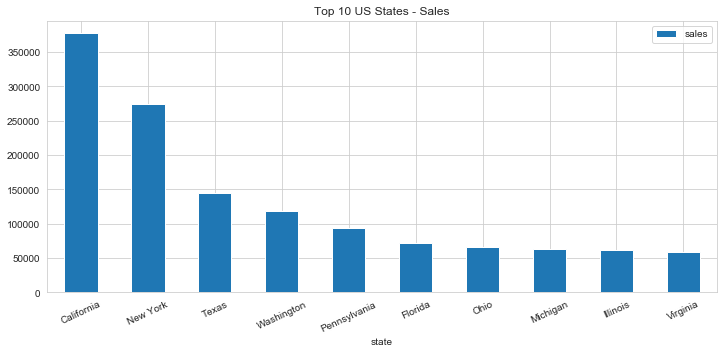

In [21]:
#since US is our biggest source of revenue and volume of sales, let's explore it's best states
us = df[df['country'] == 'United States']
us_state_rev = us.groupby('state').agg({'sales':'sum'})

sns.set_style("whitegrid")
us_state_rev.sort_values('sales', ascending=False).head(10).plot(kind='bar',rot=25, figsize=[12,5]).set_title('Top 10 US States - Sales')

In [22]:
#what about revenue by markets?
df.groupby('market').agg({'sales':'sum'}).sort_values('sales',ascending=False)

,sales
market,
APAC,"2,920,138.66"
EU,"2,345,617.86"
US,"1,929,659.27"
LATAM,"1,760,747.65"
EMEA,"656,421.80"
Africa,"630,338.59"
Canada,"58,305.18"


In [23]:
#top 10 products in terms of volume of sales
df['product_name'].value_counts().head(10)

Staples                                  187
Cardinal Index Tab, Clear                 81
Eldon File Cart, Single Width             78
Ibico Index Tab, Clear                    69
Sanford Pencil Sharpener, Water Color     66
Stanley Pencil Sharpener, Water Color     64
Rogers File Cart, Single Width            64
Smead File Cart, Single Width             63
Acco Index Tab, Clear                     61
Tenex File Cart, Single Width             61
Name: product_name, dtype: int64

In [24]:
#top 10 products in terms of revenue
products_rev = df.groupby('product_name').agg({'sales':'sum'})

products_rev.sort_values('sales', ascending=False).head(10)

,sales
product_name,
"Cisco Smart Phone, Full Size","70,121.82"
Canon imageCLASS 2200 Advanced Copier,"61,599.82"
"Nokia Smart Phone, Full Size","61,187.70"
"Apple Smart Phone, Full Size","57,516.63"
"Motorola Smart Phone, Full Size","55,154.53"
"Hon Executive Leather Armchair, Adjustable","45,565.10"
"Harbour Creations Executive Leather Armchair, Adjustable","44,269.95"
"Nokia Smart Phone, with Caller ID","43,418.19"
"Office Star Executive Leather Armchair, Adjustable","42,893.36"


In [25]:
#top 10 products in terms of average unit cost
products_cost = df.groupby('product_name').agg({'unit_cost':'mean'})

products_cost.sort_values('unit_cost', ascending=False).head(10)

,unit_cost
product_name,
Cisco TelePresence System EX90 Videoconferencing Unit,"4,070.88"
Cubify CubeX 3D Printer Triple Head Print,"2,791.29"
Cubify CubeX 3D Printer Double Head Print,"2,162.50"
Canon imageCLASS 2200 Advanced Copier,"1,753.62"
High Speed Automatic Electric Letter Opener,"1,536.55"
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color","1,097.88"
Lexmark MX611dhe Monochrome Laser Printer,"1,082.65"
"3D Systems Cube Printer, 2nd Generation, Magenta",898.48
Okidata MB760 Printer,871.92


In [26]:
#categories, in terms of sales and orders
categories = df.groupby('category').agg({'sales':'sum','order_id':'count'})

#renaming it's columns
categories.columns = ['total_sales','total_orders']

categories

,total_sales,total_orders
category,,
Furniture,"3,336,547.07",7995
Office Supplies,"3,111,351.77",25390
Technology,"3,853,330.18",8218


In [27]:
#what were our best year-months, in terms of sales volume?
df.groupby('year_month').agg({'order_id':'count'}).sort_values('order_id', ascending=False).head()

,order_id
year_month,
2014-06,1402
2014-12,1338
2014-11,1320
2014-08,1295
2014-03,1268


### Insights:
1.United States, France and Australia are our top 3 countries in terms of volume of sales. And even though France and Australia have the same volume of sales, Australia has the edge in terms of revenue, showing a bigger average ticket.

2.California and New York are the states that bring the most revenue to the US;

3.APAC's the market that brings the most revenue - Australia and China are in the top 4 countries in terms of revenue;

4.Staples were the most sold item, Cisco Smart Phone was the product that brought the most revenue and Cisco TelePresence System EX90 Videoconferencing Unit was the product with the biggest average unit cost;

5.In terms of revenue, our 3 categories seem pretty even, but in terms of volume of sales, Office Supplies is the clear-cut winner;

6.Our best month, in terms of sales volume, was June-2014

## Simple time series analysis 

Text(0.5, 1.0, 'Revenue by Year')

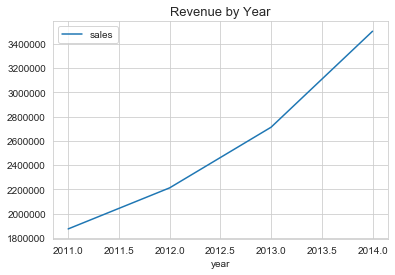

In [28]:
#checking our revenue over the years
year_sales = df.groupby('year').agg({'sales':'sum'})
year_sales.plot().set_title('Revenue by Year', fontsize=13)

Text(0.5, 1.0, 'Volume of sales by Year')

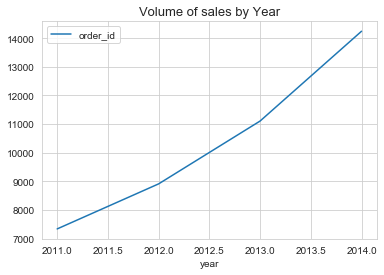

In [29]:
#checking our volume of sales over the years
year_volume = df.groupby('year').agg({'order_id':'count'})
year_volume.plot().set_title('Volume of sales by Year', fontsize=13)

Text(0.5, 1.0, 'Revenue by Year-Month')

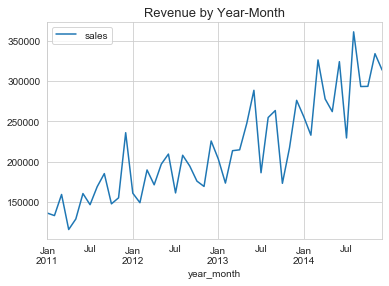

In [30]:
#revenue by month
df.groupby('year_month').agg({'sales':'sum'}).plot().set_title('Revenue by Year-Month', fontsize=13)

Text(0.5, 1.0, 'Volume of sales by Year-Month')

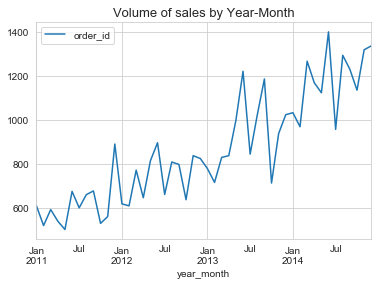

In [31]:
#volume of sales by month
df.groupby('year_month').agg({'order_id':'count'}).plot().set_title('Volume of sales by Year-Month', fontsize=13)

Text(0.5, 1.0, 'Total revenue by Month')

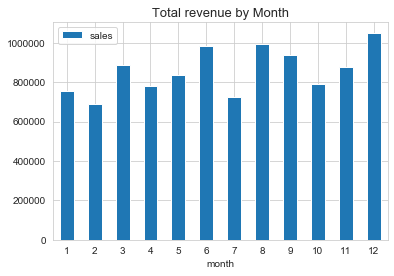

In [32]:
#which has been our best month in terms of total revenue?
revenue_month = df[['month','sales']].groupby('month').sum()
revenue_month.plot(kind='bar',rot=0).set_title('Total revenue by Month', fontsize=13)

Text(0.5, 1.0, 'Total revenue by Day of the Week')

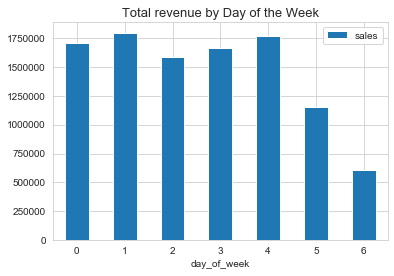

In [33]:
#which has been our best day of the week in terms of total revenue?

revenue_day_week = df[['day_of_week','sales']].groupby('day_of_week').sum()
revenue_day_week.plot(kind='bar',rot=0).set_title('Total revenue by Day of the Week', fontsize=13)

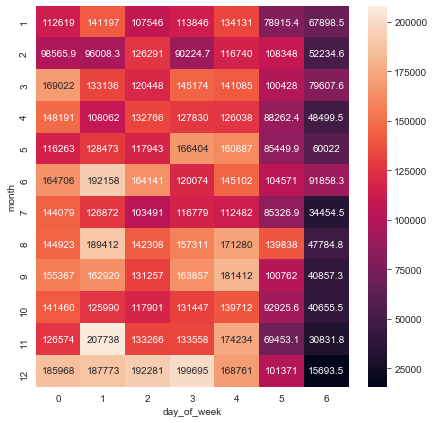

In [34]:
##plotting the agglomeration of sales per month/day of the week

pivot = df.pivot_table(index='month', columns='day_of_week', values='sales', aggfunc='sum')

plt.figure(figsize=(7,7))
sns.heatmap(pivot,annot=True, fmt="g")

### Insights:
1.Our Revenue, as well as our Volume of Sales, has been growing steadily through the course of years;

2.December has been our best month, in terms of total revenue;

3.Our sales tend to be pretty equal from Monday to Friday, and then drop off on the weekend.

# Checking our negative profits

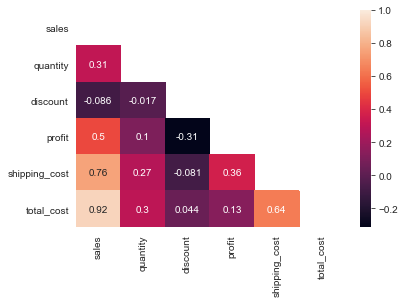

In [35]:
#checking the relation between negative profit and discounts

corr = df[['sales','quantity','discount','profit','shipping_cost','total_cost']].corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))

sns.heatmap(corr, annot=True, mask=mask)

Looks like the bigger the discount, the lesser the profit (pretty intuitive also), so that explains why we have negative profits in some rows.

In [36]:
#what's the minimum discount we gave on a loss? Is there a difference between discounts?
df[df['profit'] < 0].sort_values('discount').head()

,row_id,order_id,order_date,ship_date,ship_mode,cust_id,cust_name,segment,city,state,country,market,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,month,year_month,day_of_week,order_to_ship_days,sales_by_unit,total_cost,unit_cost
33629,3005,US-2013-113740,2013-12-20,2013-12-25,Standard Class,DM-13525,Don Miller,Corporate,Juárez,Chihuahua,Mexico,LATAM,North,TEC-CO-10003931,Technology,Copiers,"Hewlett Fax Machine, High-Speed",423.31,2,0.00,-0.85,25.05,Medium,2013,12,2013-12,4,5,211.66,399.11,199.55
25501,8909,MX-2014-153913,2014-04-16,2014-04-21,Standard Class,DW-13585,Dorothy Wardle,Corporate,Santa Clara,Villa Clara,Cuba,LATAM,Caribbean,TEC-CO-10003931,Technology,Copiers,"Hewlett Fax Machine, High-Speed",423.31,2,0.00,-0.85,20.15,Medium,2014,4,2014-04,2,5,211.66,404.01,202.00
1471,3943,MX-2011-151365,2011-05-12,2011-12-12,Standard Class,HE-14800,Harold Engle,Corporate,Cuernavaca,Morelos,Mexico,LATAM,North,TEC-CO-10002404,Technology,Copiers,"HP Fax Machine, Color",802.07,4,0.00,-1.61,101.64,Low,2011,5,2011-05,3,214,200.52,702.04,175.51
26395,3031,MX-2014-154613,2014-10-16,2014-10-21,Standard Class,NF-18595,Nicole Fjeld,Home Office,Sapucaia do Sul,Rio Grande do Sul,Brazil,LATAM,South,TEC-CO-10003931,Technology,Copiers,"Hewlett Fax Machine, High-Speed",634.97,3,0.00,-1.27,53.04,Medium,2014,10,2014-10,3,5,211.66,583.20,194.40
26317,5436,MX-2011-120096,2011-10-16,2011-10-20,Standard Class,EB-13840,Ellis Ballard,Corporate,Matagalpa,Matagalpa,Nicaragua,LATAM,Central,TEC-CO-10002404,Technology,Copiers,"HP Fax Machine, Color",601.55,3,0.00,-1.21,66.73,High,2011,10,2011-10,6,4,200.52,536.03,178.68


There are products that even without a discount, give a loss!

In [37]:
#What products gave a loss, even without a discount?
loss = df.loc[(df['profit'] <= 0) & (df['discount'] == 0)]
loss.describe().T

,count,mean,std,min,25%,50%,75%,max
row_id,466.00,"25,236.54","16,681.56",91.00,"10,878.00","21,790.50","43,261.00","51,119.00"
sales,466.00,211.14,309.27,3.96,36.80,98.76,226.43,"2,372.22"
quantity,466.00,3.30,2.23,1.00,2.00,3.00,4.00,14.00
discount,466.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
profit,466.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
shipping_cost,466.00,24.79,52.60,0.05,3.21,8.58,23.40,550.74
year,466.00,"2,012.76",1.11,"2,011.00","2,012.00","2,013.00","2,014.00","2,014.00"
month,466.00,6.89,3.46,1.00,4.00,7.00,10.00,12.00
day_of_week,466.00,2.63,1.83,0.00,1.00,3.00,4.00,6.00
order_to_ship_days,466.00,39.61,56.22,0.00,3.00,5.00,61.75,214.00


In [38]:
#top products that gave loss, without a discount included
loss['product_name'].value_counts()

Stanley Markers, Easy-Erase                         21
Avery 3-Hole Punch, Recycled                        19
Avery Hole Reinforcements, Economy                  18
Boston Sketch Pad, Fluorescent                      14
Boston Markers, Water Color                         14
                                                    ..
GlobeWeis Manila Envelope, Security-Tint             1
Hon File Folder Labels, Laser Printer Compatible     1
SanDisk Message Books, Premium                       1
Deflect-O Clock, Duo Pack                            1
Elite Letter Opener, High Speed                      1
Name: product_name, Length: 117, dtype: int64

In [39]:
#what about the category that gave the most loss?
loss['category'].value_counts(normalize=True)

Office Supplies   0.72
Technology        0.16
Furniture         0.12
Name: category, dtype: float64

In [40]:
loss.groupby(['category', 'sub_category']).agg({'category':'count'})

category
category        sub_category          
Furniture       Bookcases            8
                Chairs              31
                Furnishings         15
                Tables               2
Office Supplies Appliances          14
                Art                 76
                Binders             59
                Envelopes           18
                Fasteners           20
                Labels              28
                Paper               26
                Storage             72
                Supplies            24
Technology      Accessories         26
                Copiers             28
                Machines            10
                Phones               9

## Takeaways so far:
1.We have 117 products that have given a loss - the top 3 being: Stanley Markers, Easy-Erase, Avery 3-Hole Punch, Recycled and Avery Hole Reinforcements, Economy ;

2.72% of our products with negative profit have come from Office Supplies;

3.Our worst categories/sub-categories combis in terms of profit are: Office Supplies - Art; Office Supplies - Storage and Office Supplies - Blinders;

4.The product row indicating a negative profit does not mean that the entire order gave a loss - that we will explore later.

# Exploring orders

In [41]:
#creating an orders df

df_orders = df.groupby('order_id', as_index = False).agg({'product_id':'count','sales':'sum','quantity':'sum','shipping_cost':'sum', 'total_cost':'sum','discount':'sum','profit':'sum','order_date':'first'})
df_orders.head()

,order_id,product_id,sales,quantity,shipping_cost,total_cost,discount,profit,order_date
0,AE-2011-9160,2,161.08,8,9.56,397.60,1.40,-246.08,2011-03-10
1,AE-2013-1130,2,229.00,7,60.18,405.78,1.40,-236.96,2013-10-14
2,AE-2013-1530,2,23.63,3,3.16,58.55,1.40,-38.08,2013-12-31
3,AE-2014-2840,1,42.48,1,8.04,109.50,0.70,-75.06,2014-05-11
4,AE-2014-3830,6,281.50,16,19.38,691.23,4.20,-429.11,2014-12-13


In [42]:
df_orders.columns

Index(['order_id', 'product_id', 'sales', 'quantity', 'shipping_cost',
       'total_cost', 'discount', 'profit', 'order_date'],
      dtype='object')

In [43]:
#renaming our created columns
df_orders.columns = ['order_id','products','total_sales','quantity','shipping_cost','total_cost',
                       'discount', 'profit','order_date']

In [44]:
df_orders.head()

,order_id,products,total_sales,quantity,shipping_cost,total_cost,discount,profit,order_date
0,AE-2011-9160,2,161.08,8,9.56,397.60,1.40,-246.08,2011-03-10
1,AE-2013-1130,2,229.00,7,60.18,405.78,1.40,-236.96,2013-10-14
2,AE-2013-1530,2,23.63,3,3.16,58.55,1.40,-38.08,2013-12-31
3,AE-2014-2840,1,42.48,1,8.04,109.50,0.70,-75.06,2014-05-11
4,AE-2014-3830,6,281.50,16,19.38,691.23,4.20,-429.11,2014-12-13


In [45]:
#creating an order profit margin column
df_orders['order_profit_margin'] = df_orders['profit']/df_orders['total_sales']

In [46]:
df_orders.describe()

,products,total_sales,quantity,shipping_cost,total_cost,discount,profit,order_profit_margin
count,"20,351.00","20,351.00","20,351.00","20,351.00","20,351.00","20,351.00","20,351.00","20,351.00"
mean,2.04,506.18,7.10,55.34,391.59,0.29,59.24,0.05
std,1.46,816.67,6.11,98.28,641.47,0.55,276.97,0.44
min,1.00,0.56,1.00,0.00,0.93,0.00,"-4,337.18",-3.85
25%,1.00,63.29,3.00,5.81,48.28,0.00,0.00,0.00
50%,2.00,206.40,5.00,19.83,160.48,0.00,19.95,0.17
75%,3.00,617.11,9.50,61.07,472.95,0.40,89.78,0.31
max,14.00,"23,661.23",55.00,"2,076.62","25,363.70",9.10,"8,762.39",0.50


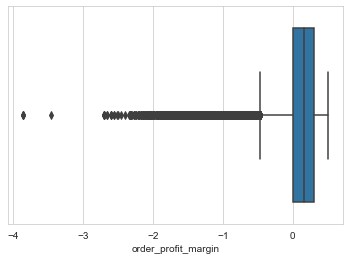

In [47]:
#looks like our profit margin has a big standard deviation comparing to it's mean, what if we plot it?

sns.boxplot(df_orders['order_profit_margin'])

In [48]:
#how many orders gave a loss?
df_orders[df_orders['profit'] < 0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5012 entries, 0 to 20350
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   order_id             5012 non-null   object        
 1   products             5012 non-null   int64         
 2   total_sales          5012 non-null   float64       
 3   quantity             5012 non-null   int64         
 4   shipping_cost        5012 non-null   float64       
 5   total_cost           5012 non-null   float64       
 6   discount             5012 non-null   float64       
 7   profit               5012 non-null   float64       
 8   order_date           5012 non-null   datetime64[ns]
 9   order_profit_margin  5012 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(2), object(1)
memory usage: 430.7+ KB


In [49]:
#orders that have a loss / total number of orders
5012 / 20351

0.2462778241855437

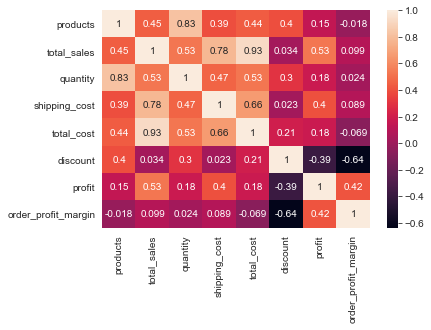

In [50]:
#checking the correlation of our values
corr2 = df_orders.corr()

sns.heatmap(corr2, annot=True)

## Orders insights:
1.24% of the orders do not give a profit;

2.On average, our orders have a 5% profit margin;

3.At least half of our orders did not have a discount. 

# Exploring customers

In [51]:
#creating a customers df
df_customers = df.groupby('cust_id', as_index = False).agg({'order_id':'count','product_id':'count','sales':'sum',
                                                            'quantity':'sum','shipping_cost':'sum', 'total_cost':'sum',
                                                            'profit':'sum','order_date':[max, min]})
df_customers.head()

cust_id order_id product_id     sales quantity shipping_cost total_cost  \
               count      count       sum      sum           sum        sum   
0  AA-10315       40         40 13,372.93      140      1,204.93  11,816.82   
1  AA-10375       31         31  4,363.21      102        679.74   2,906.28   
2  AA-10480       28         28 13,365.24      110      1,412.37  10,850.39   
3  AA-10645       68         68 14,062.11      245      1,676.15   9,560.92   
4    AA-315        6          6  1,395.88       13        138.04   1,069.46   

    profit order_date             
       sum        max        min  
0   351.19 2014-12-23 2011-03-31  
1   777.19 2014-12-25 2011-04-21  
2 1,102.48 2014-05-16 2011-01-11  
3 2,825.04 2014-11-24 2011-01-12  
4   188.38 2014-12-29 2011-08-06

In [52]:
df_customers.columns

MultiIndex([(      'cust_id',      ''),
            (     'order_id', 'count'),
            (   'product_id', 'count'),
            (        'sales',   'sum'),
            (     'quantity',   'sum'),
            ('shipping_cost',   'sum'),
            (   'total_cost',   'sum'),
            (       'profit',   'sum'),
            (   'order_date',   'max'),
            (   'order_date',   'min')],
           )

In [53]:
#renaming our created columns
df_customers.columns = ['cust_id','orders','products','sales','quantity','shipping_cost','total_cost',
                       'profit','last_purchase','first_purchase']

In [54]:
#that looks better!
df_customers.head()

,cust_id,orders,products,sales,quantity,shipping_cost,total_cost,profit,last_purchase,first_purchase
0,AA-10315,40,40,"13,372.93",140,"1,204.93","11,816.82",351.19,2014-12-23,2011-03-31
1,AA-10375,31,31,"4,363.21",102,679.74,"2,906.28",777.19,2014-12-25,2011-04-21
2,AA-10480,28,28,"13,365.24",110,"1,412.37","10,850.39","1,102.48",2014-05-16,2011-01-11
3,AA-10645,68,68,"14,062.11",245,"1,676.15","9,560.92","2,825.04",2014-11-24,2011-01-12
4,AA-315,6,6,"1,395.88",13,138.04,"1,069.46",188.38,2014-12-29,2011-08-06


In [55]:
#creating a column that calculates the number of days between first and last purchase
df_customers['duration'] = (df_customers['last_purchase'] - df_customers['first_purchase']).dt.days

df_customers.head()

,cust_id,orders,products,sales,quantity,shipping_cost,total_cost,profit,last_purchase,first_purchase,duration
0,AA-10315,40,40,"13,372.93",140,"1,204.93","11,816.82",351.19,2014-12-23,2011-03-31,1363
1,AA-10375,31,31,"4,363.21",102,679.74,"2,906.28",777.19,2014-12-25,2011-04-21,1344
2,AA-10480,28,28,"13,365.24",110,"1,412.37","10,850.39","1,102.48",2014-05-16,2011-01-11,1221
3,AA-10645,68,68,"14,062.11",245,"1,676.15","9,560.92","2,825.04",2014-11-24,2011-01-12,1412
4,AA-315,6,6,"1,395.88",13,138.04,"1,069.46",188.38,2014-12-29,2011-08-06,1241


In [56]:
df_customers['order_frequency'] = df_customers['duration'] / df_customers['orders']
df_customers['average_ticket'] = df_customers['sales'] / df_customers['orders']
df_customers['profit_margin'] = df_customers['profit'] / df_customers['sales']

df_customers.head()

,cust_id,orders,products,sales,quantity,shipping_cost,total_cost,profit,last_purchase,first_purchase,duration,order_frequency,average_ticket,profit_margin
0,AA-10315,40,40,"13,372.93",140,"1,204.93","11,816.82",351.19,2014-12-23,2011-03-31,1363,34.08,334.32,0.03
1,AA-10375,31,31,"4,363.21",102,679.74,"2,906.28",777.19,2014-12-25,2011-04-21,1344,43.35,140.75,0.18
2,AA-10480,28,28,"13,365.24",110,"1,412.37","10,850.39","1,102.48",2014-05-16,2011-01-11,1221,43.61,477.33,0.08
3,AA-10645,68,68,"14,062.11",245,"1,676.15","9,560.92","2,825.04",2014-11-24,2011-01-12,1412,20.76,206.80,0.20
4,AA-315,6,6,"1,395.88",13,138.04,"1,069.46",188.38,2014-12-29,2011-08-06,1241,206.83,232.65,0.13


In [57]:
#ranking our customers in terms of spending (reference: w3resource.com/pandas/dataframe/dataframe-rank.php)
df_customers['spending_rank'] = df_customers['sales'].rank(pct=True)
df_customers['spending_type'] = df_customers['spending_rank'].apply(lambda x: 'High' if x>0.7 else ('Medium' if (x>0.4 and x<=0.7) else 'Low'))

df_customers.head()

,cust_id,orders,products,sales,quantity,shipping_cost,total_cost,profit,last_purchase,first_purchase,duration,order_frequency,average_ticket,profit_margin,spending_rank,spending_type
0,AA-10315,40,40,"13,372.93",140,"1,204.93","11,816.82",351.19,2014-12-23,2011-03-31,1363,34.08,334.32,0.03,0.86,High
1,AA-10375,31,31,"4,363.21",102,679.74,"2,906.28",777.19,2014-12-25,2011-04-21,1344,43.35,140.75,0.18,0.48,Medium
2,AA-10480,28,28,"13,365.24",110,"1,412.37","10,850.39","1,102.48",2014-05-16,2011-01-11,1221,43.61,477.33,0.08,0.86,High
3,AA-10645,68,68,"14,062.11",245,"1,676.15","9,560.92","2,825.04",2014-11-24,2011-01-12,1412,20.76,206.80,0.20,0.88,High
4,AA-315,6,6,"1,395.88",13,138.04,"1,069.46",188.38,2014-12-29,2011-08-06,1241,206.83,232.65,0.13,0.26,Low


In [58]:
df_customers.describe().T

,count,mean,std,min,25%,50%,75%,max
orders,"1,586.00",26.23,18.13,1.00,9.00,24.00,41.00,85.00
products,"1,586.00",26.23,18.13,1.00,9.00,24.00,41.00,85.00
sales,"1,586.00","6,495.10","5,892.16",7.17,"1,335.80","5,108.43","10,407.18","33,709.24"
quantity,"1,586.00",91.08,74.74,1.00,21.00,66.00,157.00,320.00
shipping_cost,"1,586.00",710.14,649.81,0.70,136.36,530.43,"1,166.49","3,146.29"
total_cost,"1,586.00","5,024.81","4,570.03",8.11,"1,062.99","3,785.66","8,042.77","30,626.95"
profit,"1,586.00",760.15,"1,183.49","-5,371.32",57.74,446.61,"1,313.65","8,641.82"
duration,"1,586.00","1,096.19",346.98,0.00,946.50,"1,228.00","1,352.00","1,459.00"
order_frequency,"1,586.00",67.89,61.01,0.00,30.14,42.91,87.80,702.50
average_ticket,"1,586.00",215.91,121.25,7.17,130.94,208.15,281.29,"1,391.52"


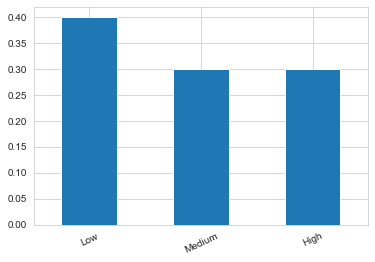

In [59]:
#plotting our spending type, we can see we have almost an even distribution
df_customers['spending_type'].value_counts(normalize=True).plot(kind='bar',rot=25)

## Customer insights:
1.On average, our customers had ~26 orders, in the course of 4 years, and spent ~6,495

2.40% of our customer base has a "low" type of spending;

3.215.91 has been our average ticket.

# That's all for now. Thanks a lot! 